# Lake model continued

In the previous week you used the lake problem as a means of getting aquinted with the workbench. In this assignment we will continue with the lake problem, focussing explicitly on using it for open exploration. You can use the second part of [this tutorial](https://emaworkbench.readthedocs.io/en/latest/indepth_tutorial/open-exploration.html) for help.

**It is paramount that you are using the lake problem with 100 decision variables, rather than the one found on the website with the seperate anthropogenic release decision**

## Apply scenario discovery

1. Generate 10 policies and 1000 scenarios and evaluate them.
2. The experiments array contains the values for each of the 100 decision levers. This might easily mess up the analysis. Remove these columns from the experiment array. *hint: use `experiments.drop`*
3. Apply scenario discovery, focussing on the 10 percent of worst outcomes for reliability


In [1]:
from ema_workbench import (Model, RealParameter, ScalarOutcome)
from ema_workbench import (ema_logging)
ema_logging.log_to_stderr(ema_logging.INFO)

from lakemodel_function import lake_problem

import math
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#define model...
model = Model("LakeProblemModel", function = lake_problem)


#specify uncertainties
model.uncertainties = [RealParameter('b', 0.1, 0.45),
                       RealParameter('q', 2.0, 4.5),
                       RealParameter('mean', 0.01, 0.05),
                       RealParameter('stdev', 0.001, 0.005),
                       RealParameter('delta', 0.93, 0.99)]
 
# set levers
ldecisions = ['l0', 'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'l7', 'l8', 'l9', 'l10', 'l11', 'l12', 'l13',
            'l14', 'l15', 'l16', 'l17', 'l18', 'l19', 'l20', 'l21', 'l22', 'l23', 'l24', 'l25',
            'l26', 'l27', 'l28', 'l29', 'l30', 'l31', 'l32', 'l33', 'l34', 'l35', 'l36', 'l37',
            'l38', 'l39', 'l40', 'l41', 'l42', 'l43', 'l44', 'l45', 'l46', 'l47', 'l48', 'l49',
            'l50', 'l51', 'l52', 'l53', 'l54', 'l55', 'l56', 'l57', 'l58', 'l59', 'l60', 'l61',
            'l62', 'l63', 'l64', 'l65', 'l66', 'l67', 'l68', 'l69', 'l70', 'l71', 'l72', 'l73',
            'l74', 'l75', 'l76', 'l77', 'l78', 'l79', 'l80', 'l81', 'l82', 'l83', 'l84', 'l85',
            'l86', 'l87', 'l88', 'l89', 'l90', 'l91', 'l92', 'l93', 'l94', 'l95', 'l96', 'l97',
            'l98', 'l99']

levers =[]
for i in ldecisions:
    levers.append(RealParameter(str(i),0,0.1))

model.levers = levers

 
def process_p(values):
    values = np.asarray(values)
    values = np.mean(values, axis=0)
    return np.max(values)
 
#specify outcomes
model.outcomes = [ScalarOutcome('max_P'),
                  ScalarOutcome('utility'),
                  ScalarOutcome('inertia'),
                  ScalarOutcome('reliability')]

In [2]:
from ema_workbench import (MultiprocessingEvaluator,
                           perform_experiments)
import os
os.system("lakemodel_function.py")
from lakemodel_function import lake_problem

with MultiprocessingEvaluator(model, n_processes=7) as evaluator:
    experiments, outcomes = evaluator.perform_experiments(scenarios=1000, policies=10)  

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 10 policies * 1 model(s) = 10000 experiments
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] 2000 cases completed
[MainProcess/INFO] 3000 cases completed
[MainProcess/INFO] 4000 cases completed
[MainProcess/INFO] 5000 cases completed
[MainProcess/INFO] 6000 cases completed
[MainProcess/INFO] 7000 cases completed
[MainProcess/INFO] 8000 cases completed
[MainProcess/INFO] 9000 cases completed
[MainProcess/INFO] 10000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [3]:
experiments.head()

,b,delta,mean,q,stdev,l0,l1,l10,l11,l12,...,l93,l94,l95,l96,l97,l98,l99,scenario,policy,model
0,0.195161,0.973294,0.034489,3.484916,0.004688,0.091245,0.0099,0.02796,0.032454,0.017838,...,0.095844,0.068805,0.075447,0.021582,0.06248,0.014219,0.081417,0,0,LakeProblemModel
1,0.258731,0.956857,0.013808,3.371210,0.004694,0.091245,0.0099,0.02796,0.032454,0.017838,...,0.095844,0.068805,0.075447,0.021582,0.06248,0.014219,0.081417,1,0,LakeProblemModel
2,0.117740,0.954647,0.035609,3.244380,0.004807,0.091245,0.0099,0.02796,0.032454,0.017838,...,0.095844,0.068805,0.075447,0.021582,0.06248,0.014219,0.081417,2,0,LakeProblemModel
3,0.126624,0.944691,0.037342,2.437662,0.001907,0.091245,0.0099,0.02796,0.032454,0.017838,...,0.095844,0.068805,0.075447,0.021582,0.06248,0.014219,0.081417,3,0,LakeProblemModel
4,0.213030,0.980791,0.047197,4.225618,0.001067,0.091245,0.0099,0.02796,0.032454,0.017838,...,0.095844,0.068805,0.075447,0.021582,0.06248,0.014219,0.081417,4,0,LakeProblemModel


In [4]:
print(experiments.shape)

(10000, 108)


In [5]:
#removing columns using experiments.drop
#from ema_workbench.analysis import prim
#experiments.policy.unique()

from ema_workbench import Policy

cleaned = experiments.drop(columns=[l.name for l in model.levers])
cleaned.head()

,b,delta,mean,q,stdev,scenario,policy,model
0,0.195161,0.973294,0.034489,3.484916,0.004688,0,0,LakeProblemModel
1,0.258731,0.956857,0.013808,3.371210,0.004694,1,0,LakeProblemModel
2,0.117740,0.954647,0.035609,3.244380,0.004807,2,0,LakeProblemModel
3,0.126624,0.944691,0.037342,2.437662,0.001907,3,0,LakeProblemModel
4,0.213030,0.980791,0.047197,4.225618,0.001067,4,0,LakeProblemModel


In [6]:
print (cleaned.shape)

(10000, 8)


### Applying Scenario Discovery to find 10% worst outcomes for reliability

In [7]:
#rel=pd.DataFrame(outcomes['reliability'])
#rel=rel.sort_values(by=0)
#rel=rel.reset_index(drop=True)
#rel.iloc[1000]

In [8]:
#comparing to insights from scenario discovery 
from ema_workbench.analysis import prim

x = cleaned
y = outcomes['reliability'] < 0.05

primalg = prim.Prim(x,y, 0.8, peel_alpha=0.05)
box1= primalg.find_box()

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 10000 points remaining, containing 806 cases of interest
[MainProcess/INFO] mean: 0.8045112781954887, mass: 0.0532, coverage: 0.5310173697270472, density: 0.8045112781954887 restricted_dimensions: 4


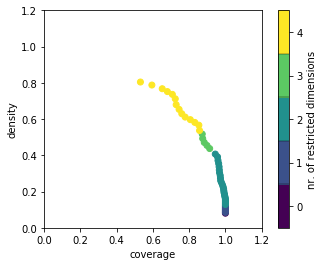

In [9]:
box1.show_tradeoff()
plt.show()

In [10]:
#checking number of points
box1.peeling_trajectory

,coverage,density,id,mass,mean,res_dim
0,1.000000,0.080600,0,1.0000,0.080600,0
1,1.000000,0.084842,1,0.9500,0.084842,1
2,1.000000,0.089357,2,0.9020,0.089357,1
3,1.000000,0.094159,3,0.8560,0.094159,1
4,1.000000,0.099139,4,0.8130,0.099139,1
5,1.000000,0.104404,5,0.7720,0.104404,1
6,1.000000,0.109959,6,0.7330,0.109959,1
7,1.000000,0.115805,7,0.6960,0.115805,1
8,1.000000,0.121936,8,0.6610,0.121936,1
9,1.000000,0.128549,9,0.6270,0.128549,2


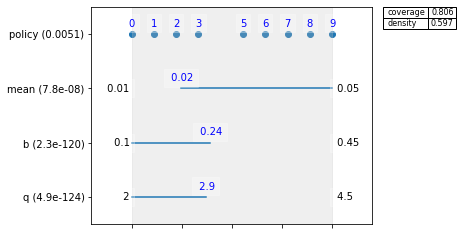

coverage    0.806452
density     0.596878
id                41
mass          0.1089
mean        0.596878
res_dim            4
Name: 41, dtype: object

                             box 41                               \
                                min                          max   
q                           2.00073                      2.92475   
b                          0.100016                     0.236896   
mean                      0.0198588                     0.049965   
policy  {0, 1, 2, 3, 5, 6, 7, 8, 9}  {0, 1, 2, 3, 5, 6, 7, 8, 9}   

                                         
                              qp values  
q        [-1.0, 4.933220885358852e-124]  
b       [-1.0, 2.2892950745108895e-120]  
mean      [7.794641794436106e-08, -1.0]  
policy     [0.005079239979541102, -1.0]  



In [11]:
box1.inspect(41, style='graph')
plt.show()

box1.inspect(41)

policy [0, 1, 2, 3, 5, 6, 7, 8, 9, 4]


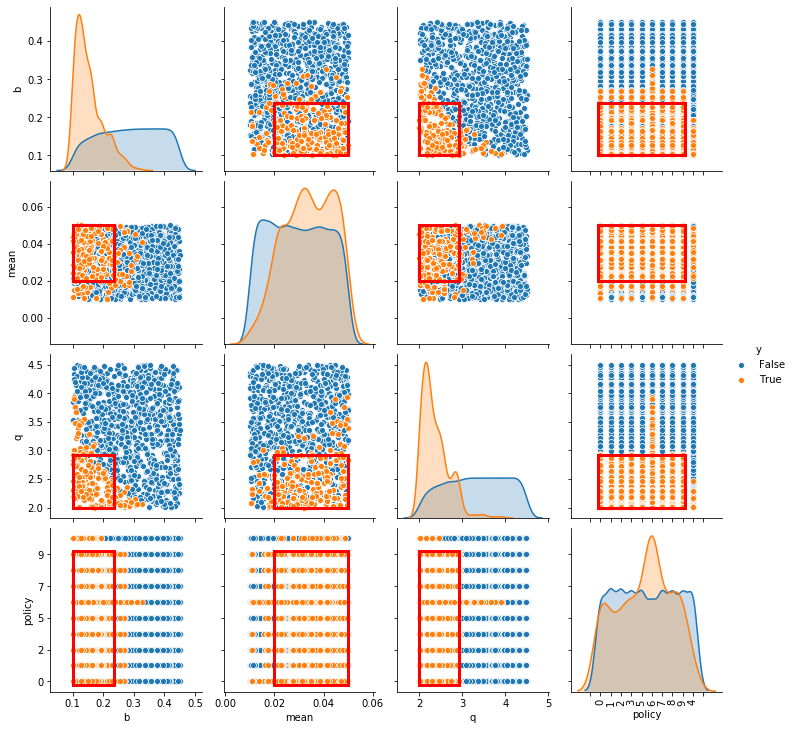

In [12]:
box1.show_pairs_scatter(41)
plt.show()

#### Summary of Scenario Discovery Results

The graphs above show that outcomes of interest are located in different regions for each uncertainty
* For b: out comes of interest are located in the region of low q, high mean values
* For q: outcomes of interest are located in the region of high mean, low b values
* For the mean, outcomes of interest are located in the region of low q and low k values
* For all policies, outcomes of interest are located in regions of low q, low k and high mean values

## Visualize the results using Dimensional Stacking
Take the classification of outcomes as used in step 3 of scenario discovery, and instead visualize the results using dimensional stacking. How do these results compare to the insights from scenario discovery?

[MainProcess/INFO] model dropped from analysis because only a single category


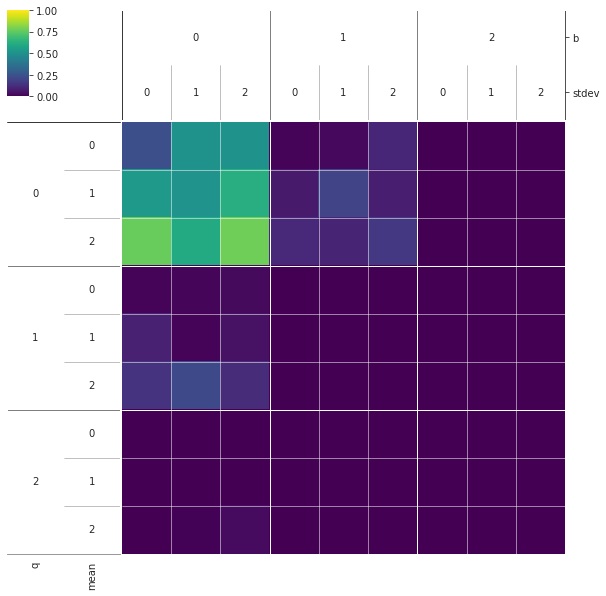

In [13]:
from ema_workbench.analysis import dimensional_stacking

x = cleaned
y = outcomes['reliability'] < 0.05

dimensional_stacking.create_pivot_plot(x,y, 2, nbins=3)
plt.show()

#### Summary of Dimensional Stacking Results

* Dimensional stacking results show us that most outcomes of interest occur in the region of a low q value, a low b value and a high mean. This is consistent with figures shown in Scenario discovery as described above. 